In [1]:
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd

# Connecting to the Database
print("Trying to connect to db")
conn = psycopg2.connect(
    database="piscineds",
    user="ggobert",
    password="mysecretpassword",
    host=0
)
print("Connection success!")

cur = conn.cursor()
cur.execute(""" 
    SELECT 
        user_id, 
        COUNT(*),
        COALESCE(SUM(CAST(REPLACE(REPLACE(price::text, '$', ''), ',', '') AS FLOAT)), 0) AS total_spent
    FROM
        customers
    WHERE
        event_type = 'purchase'
    GROUP BY
        user_id
""")
results = cur.fetchall()
franquencies = [row[1] for row in results]
spent_by_user = [row[2] for row in results]

cur.close()
conn.close()

Trying to connect to db
Connection success!


In [2]:
import numpy as np

def my_IQR(data):

    # Calcul des quartiles (Q1 et Q3)
    Q1 = np.percentile(data, 25)  # 25ème percentile
    Q3 = np.percentile(data, 75)  # 75ème percentile

    # Calcul de l'IQR
    IQR = Q3 - Q1

    # Calcul des bornes pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identification des outliers
    return [x for x in data if lower_bound <= x <= upper_bound]

In [3]:
franquencies = my_IQR(franquencies)
spent_by_user = my_IQR(spent_by_user)

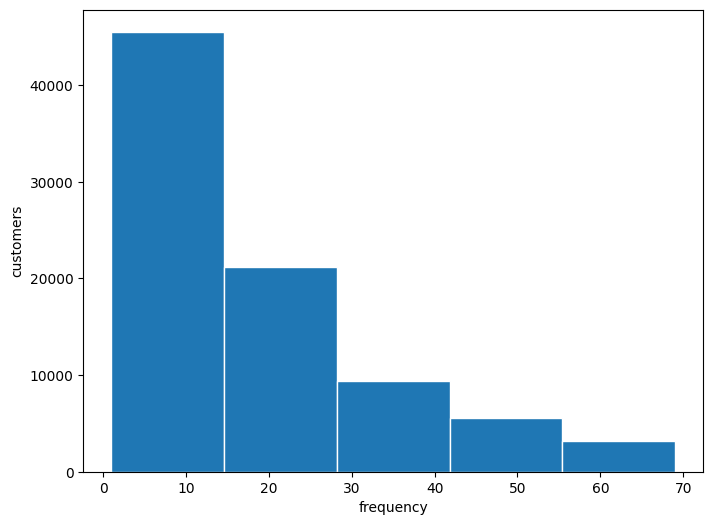

In [4]:
plt.figure(figsize=(8, 6))
plt.hist(franquencies, bins=5, edgecolor='white')
plt.xlabel('frequency')
plt.ylabel('customers')
plt.show()

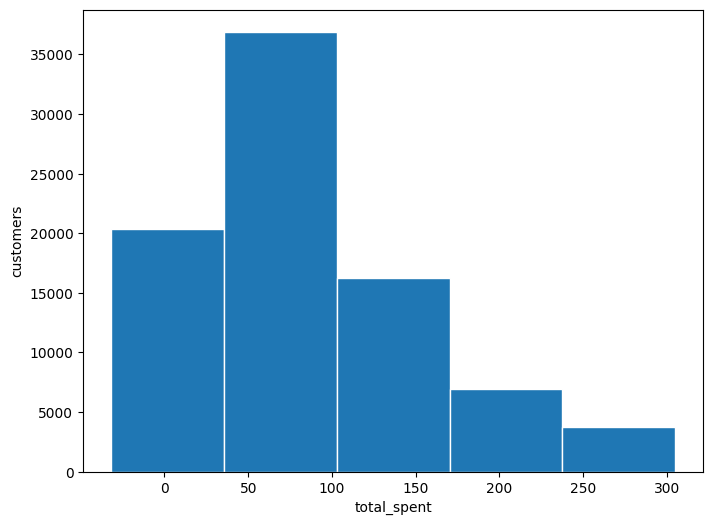

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(spent_by_user, bins=5, edgecolor='white')
plt.xlabel('total_spent')
plt.ylabel('customers')

plt.show()